In [203]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
df_master = pd.read_csv("/Users/ally/Documents/GitHub/2024-winter-compostable/data/CASP004-01/masterfile.csv")
df_master['product_brand'] = df_master['product_brand'].str.rstrip()
def correct_product_brand_spacing(df, column_name):
    # Add a space before the slash if it's not there and remove extra spaces after the slash
    df[column_name] = df[column_name].str.replace(r'/', ' / ').str.replace(r'\s+', ' ', regex=True)
    return df

df_master = correct_product_brand_spacing(df_master, 'product_brand')
df_master['material_I'] = df_master['material_I'].str.replace('Bioopolymer', 'Biopolymer')


## Outlier Analysis

In [206]:
df_non_outlier = df_master[df_master['outlier_alert']==False]
len(df_non_outlier)

912

In [207]:
df_outlier = df_master[df_master['outlier_alert']==True]
len(df_outlier)

132

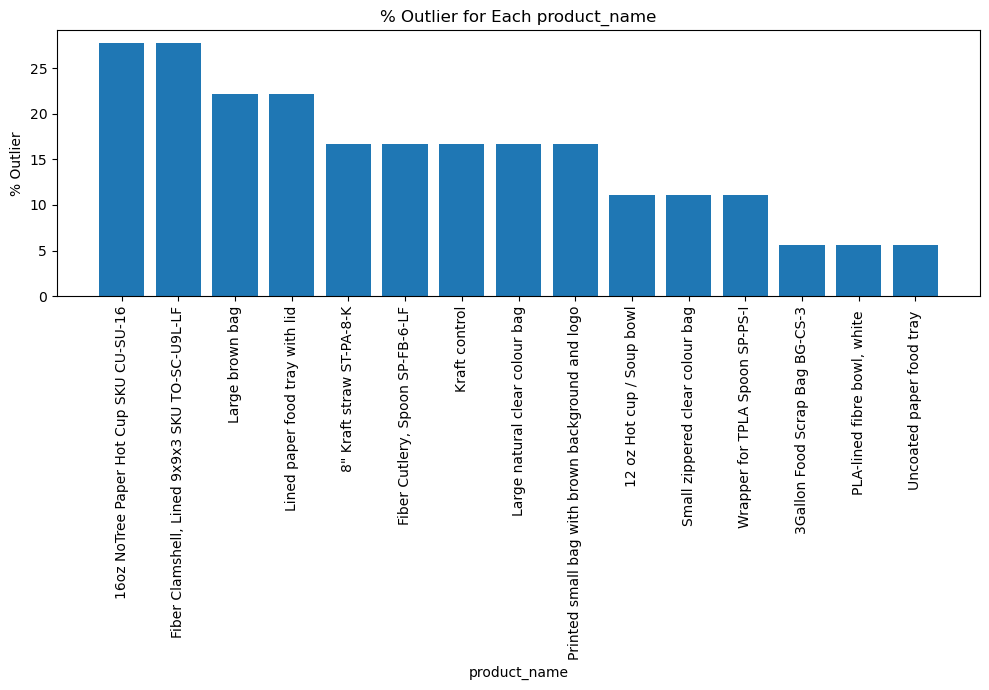

In [208]:
def outlier_plot(col):
    outlier_category = df_outlier.groupby([col])['outlier_alert'].count().reset_index()
    df = df_master.groupby([col])['outlier_alert'].count().reset_index()
    outlier_category = outlier_category.merge(df, on=col)
    outlier_category['%_outlier'] = (outlier_category['outlier_alert_x'] / outlier_category['outlier_alert_y'] * 100).round(2)
    outlier_category = outlier_category.sort_values(by='%_outlier', ascending=False)
    plt.figure(figsize=(10, 7))
    plt.bar(outlier_category[col], outlier_category['%_outlier'])
    plt.title(f'% Outlier for Each {col}')
    plt.xlabel(col)
    plt.ylabel('% Outlier')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
outlier_plot('product_name')


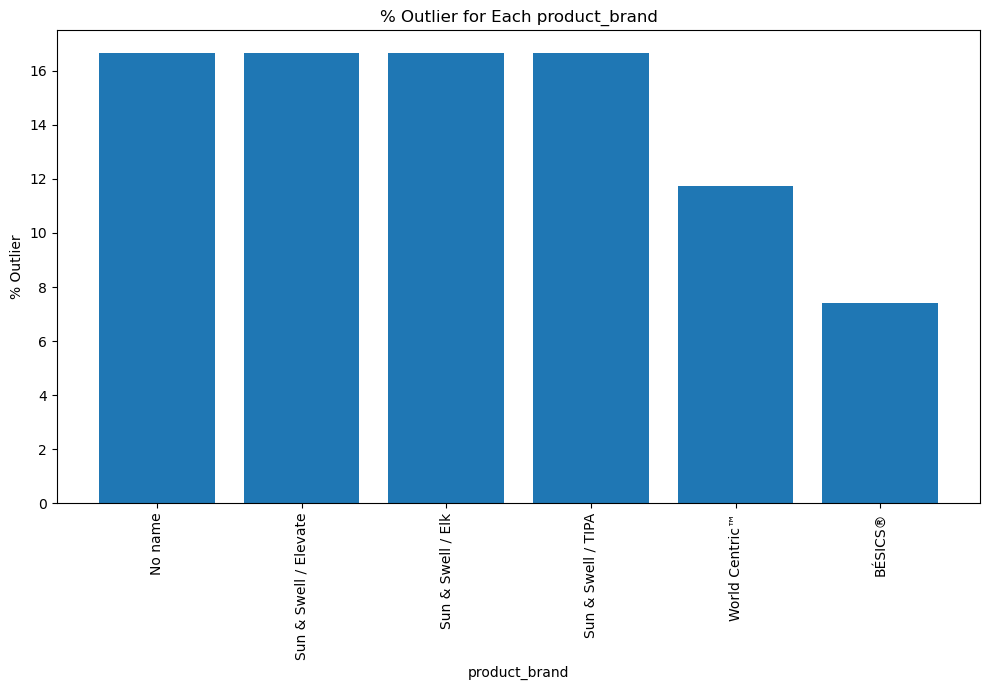

In [209]:
outlier_plot('product_brand')

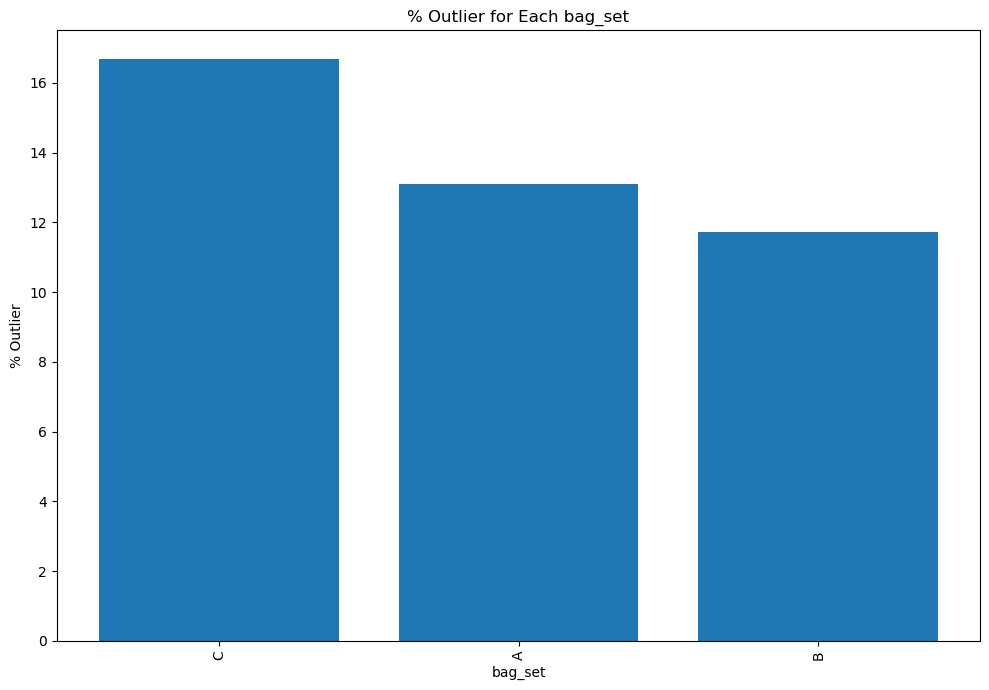

In [210]:
outlier_plot('bag_set')

### Plot Functions Set Up

In [310]:
df_end = df_master[df_master['trial_stage'] == 'End']
df_non_outlier = df_end[df_end['outlier_alert']==False]

def bar_whisker_plot(df, x, y, outlier):
    iqr = df.groupby(x)[y].apply(lambda g: g.quantile(0.75) - g.quantile(0.25))
    nonzero_iqr_order = df[df[x].isin(iqr[iqr > 0].index)].groupby(x)[y].median().sort_values().index
    zero_iqr_order = iqr[iqr == 0].index
    order = zero_iqr_order.append(nonzero_iqr_order)
    plt.figure(figsize=(12, 8))
    sns.boxplot(data = df, x=x, y=y, order=order)
    plt.title(f'{y} for Each {x} {outlier}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_violin(df, x, y):
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=x, y=y, data=df, palette="viridis")
    plt.title('Violin Plot of % Residual for Each {x} Type')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Average Weight Pre and Post Composting

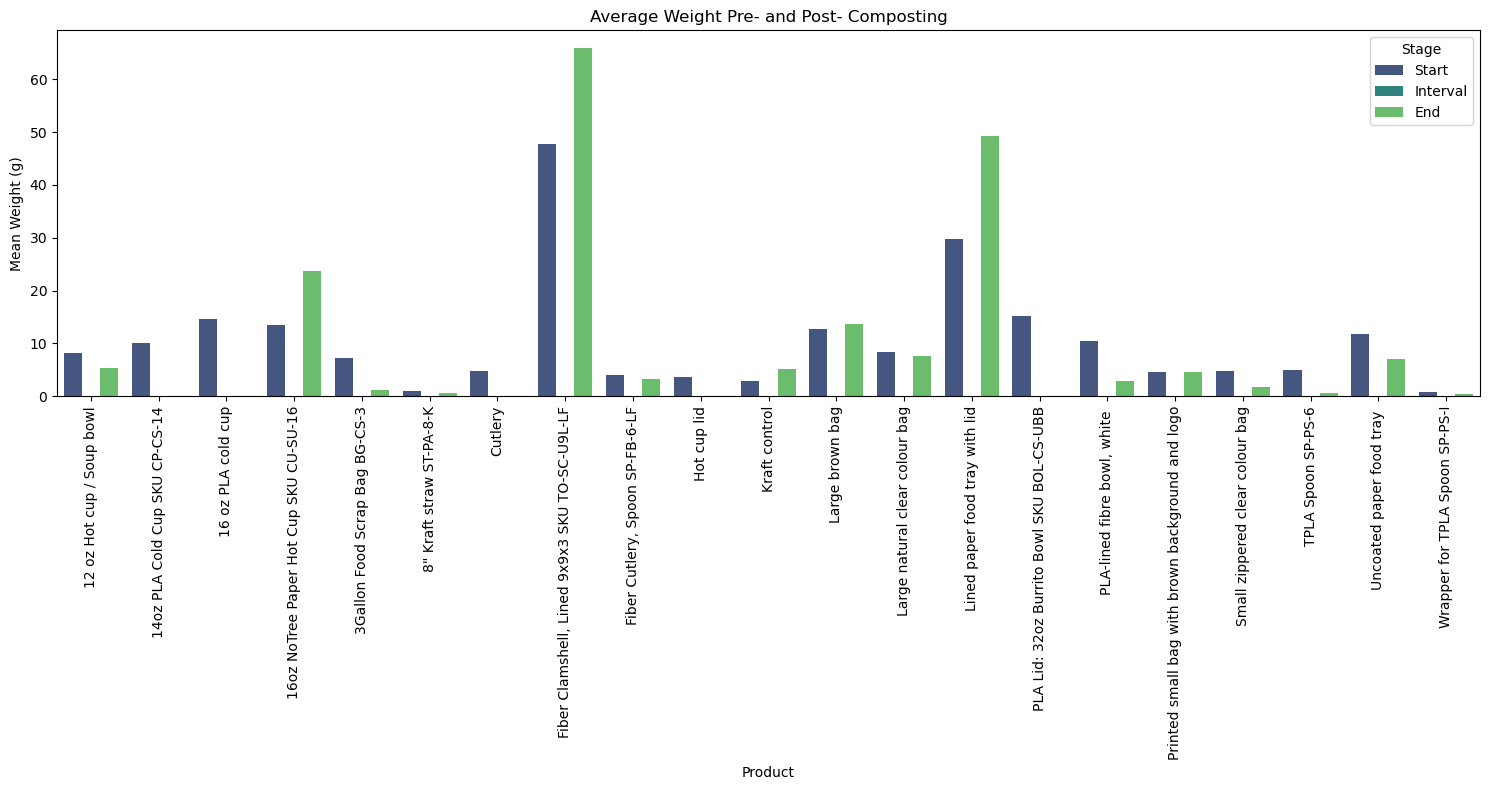

In [213]:
stage_order = pd.CategoricalDtype(
    categories=["Start", "Interval", "End"],
    ordered=True
)
df_master['trial_stage'] = df_master['trial_stage'].astype(stage_order)

stages_ordered = df_master.groupby(['product_name', 'trial_stage'])['mean_weight_final_g'].mean().reset_index().round(2)
plt.figure(figsize=(15, 8))
sns.barplot(x='product_name', y='mean_weight_final_g', hue='trial_stage', data=stages_ordered, palette="viridis")
plt.title('Average Weight Pre- and Post- Composting')
plt.xlabel('Product')
plt.ylabel('Mean Weight (g)')
plt.xticks(rotation=90)
plt.legend(title='Stage')
plt.tight_layout()
plt.show()


## % Residual by Products

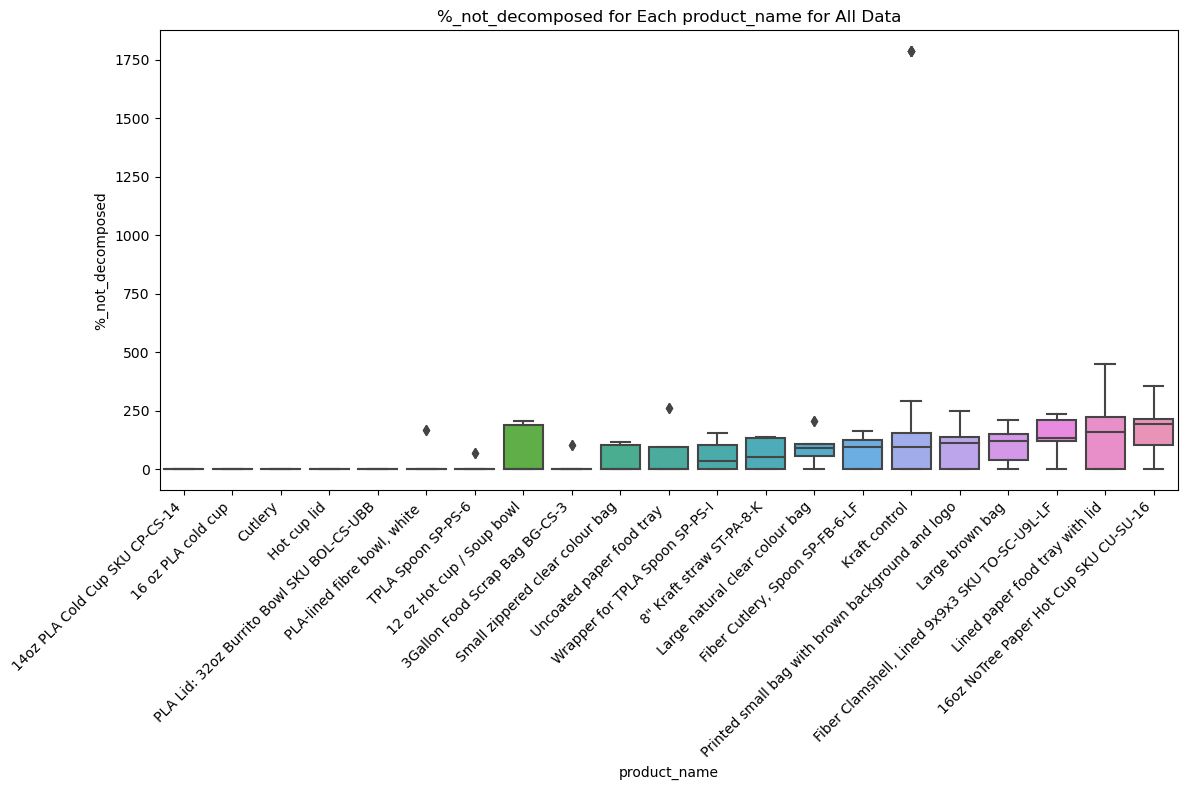

In [286]:
bar_whisker_plot(df_end, 'product_name', '%_not_decomposed', 'for All Data')

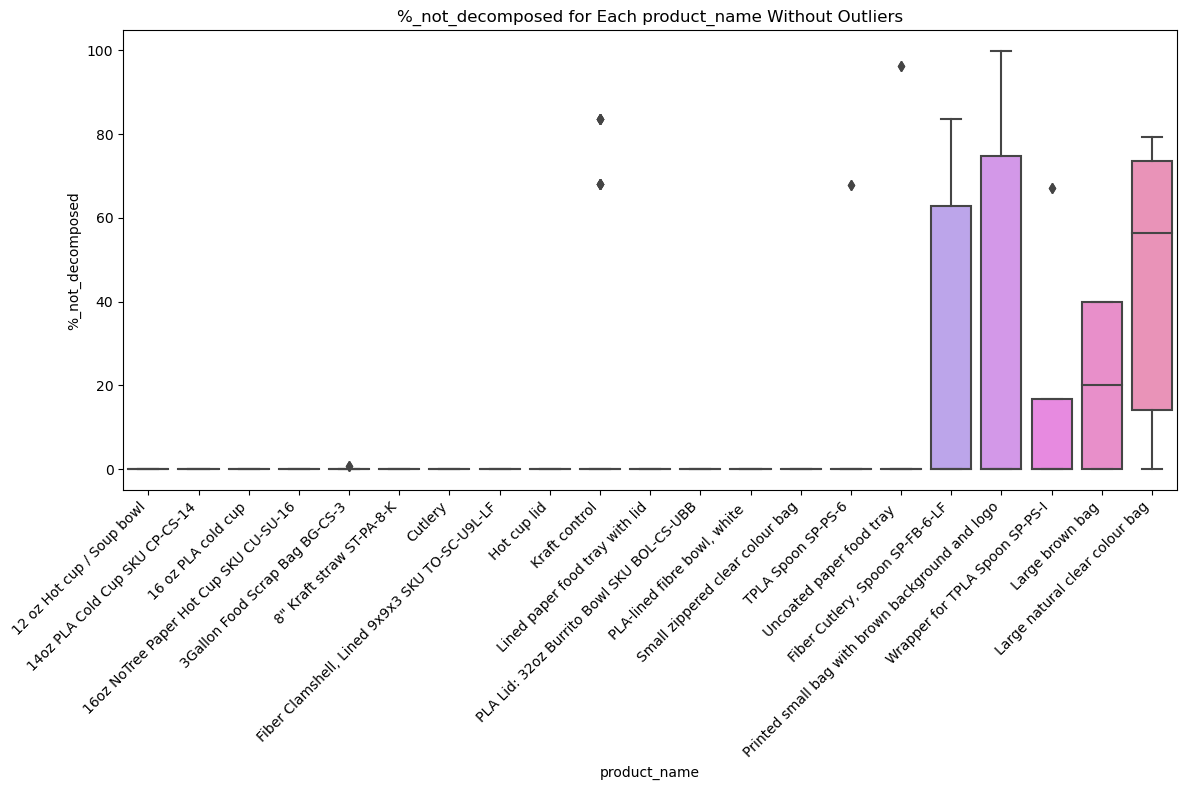

In [316]:
bar_whisker_plot(df_non_outlier, 'product_name', '%_not_decomposed', 'Without Outliers')

## % Residual by Material Class I


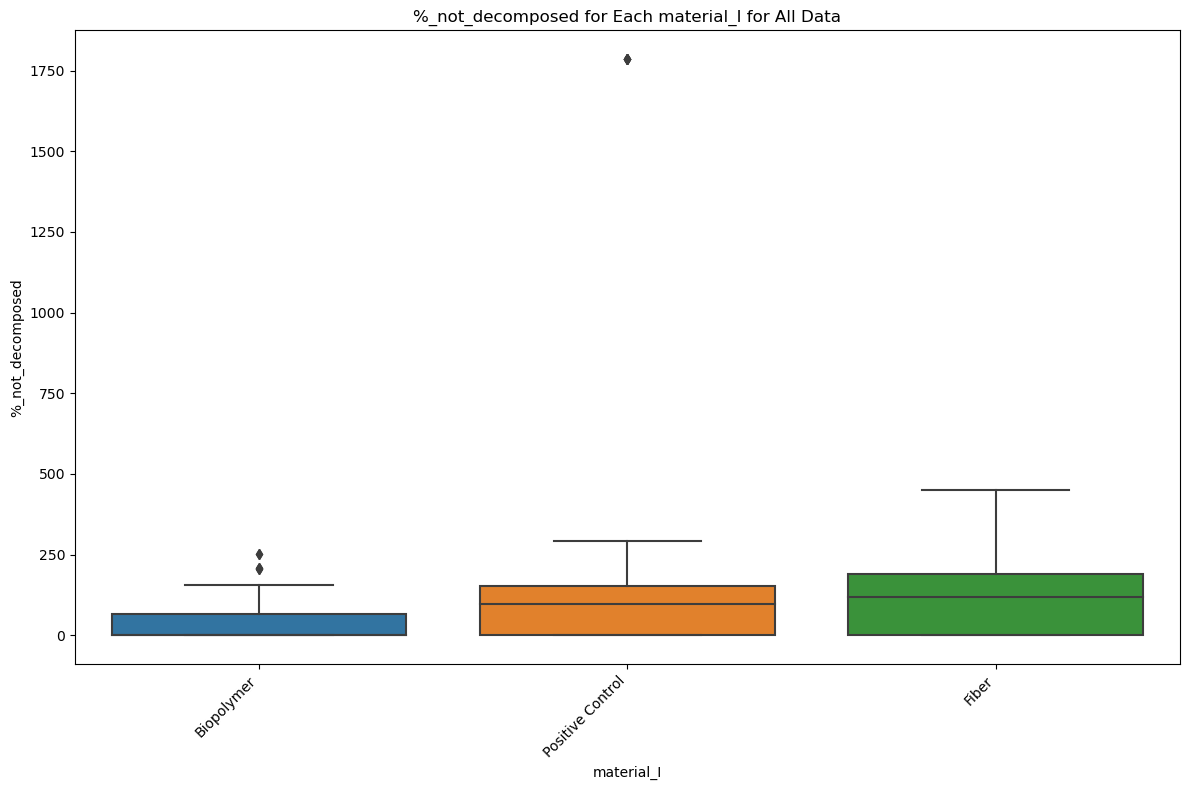

In [311]:
bar_whisker_plot(df_end, 'material_I', '%_not_decomposed', 'for All Data')

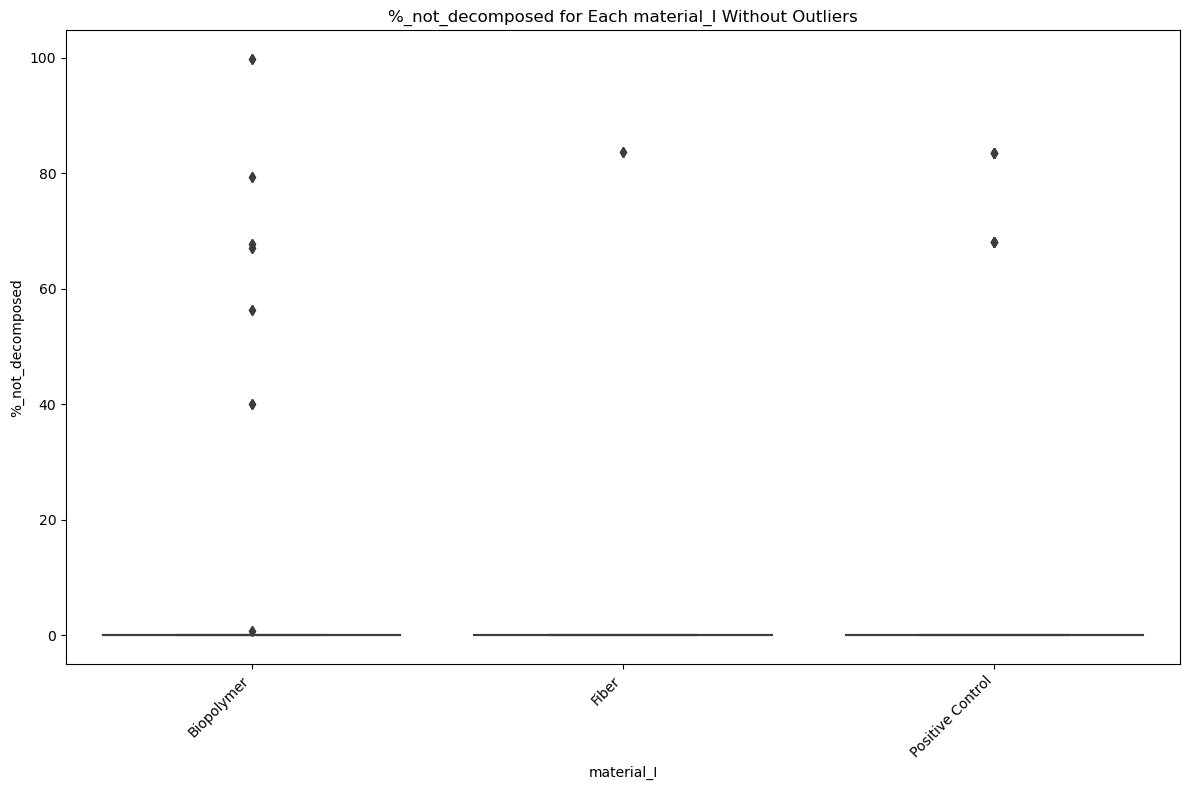

In [312]:
bar_whisker_plot(df_non_outlier, 'material_I', '%_not_decomposed', 'Without Outliers')

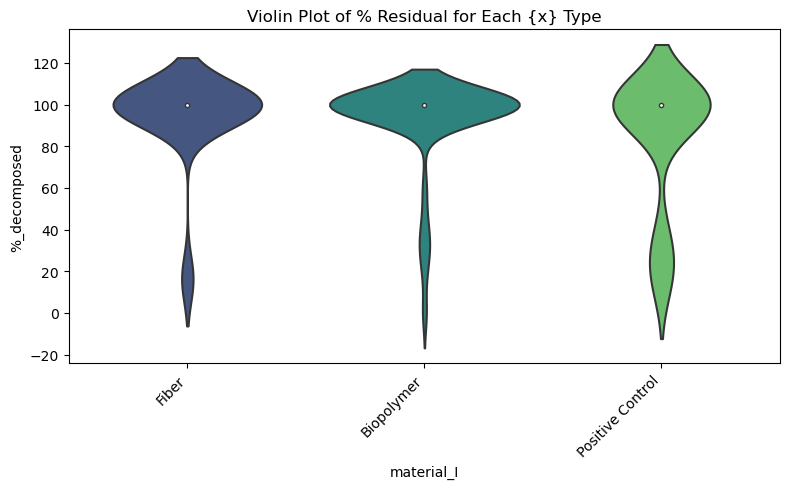

In [315]:
plot_violin(df_non_outlier, 'material_I', '%_decomposed')

## % Residual by Material Class II


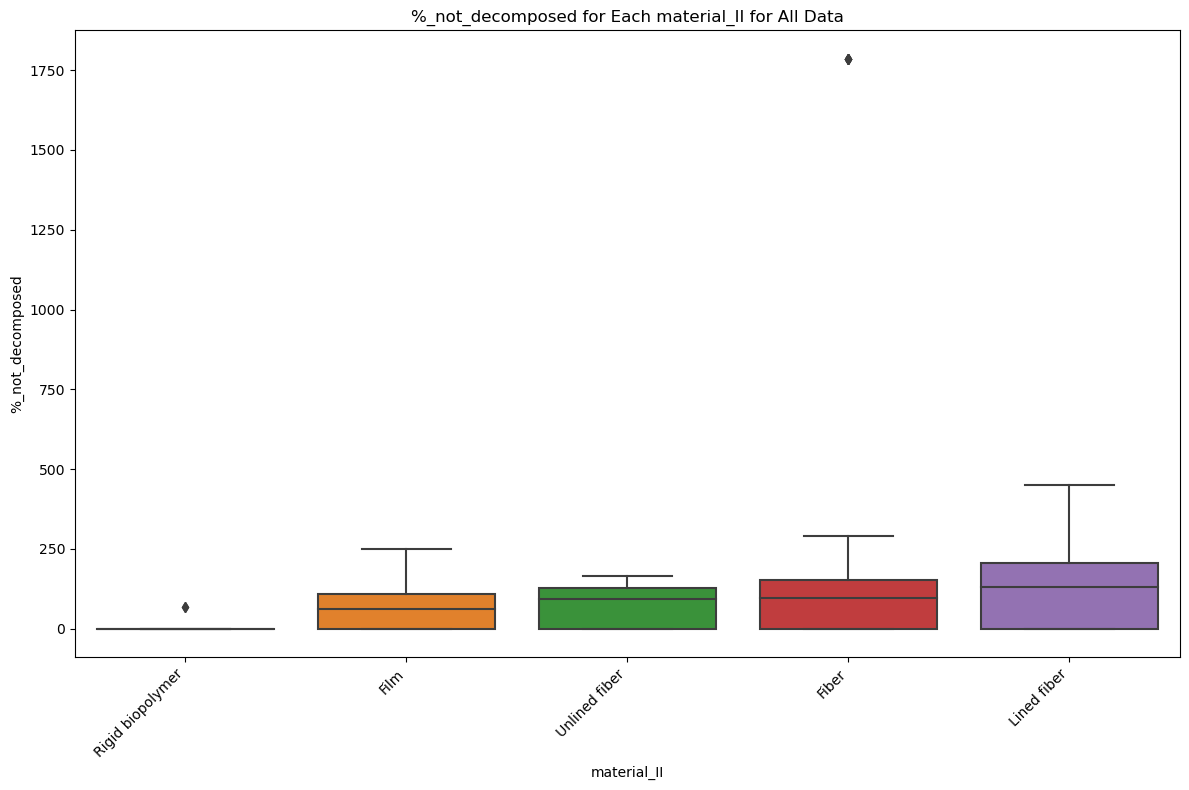

In [291]:
bar_whisker_plot(df_end, 'material_II', '%_not_decomposed', 'for All Data')

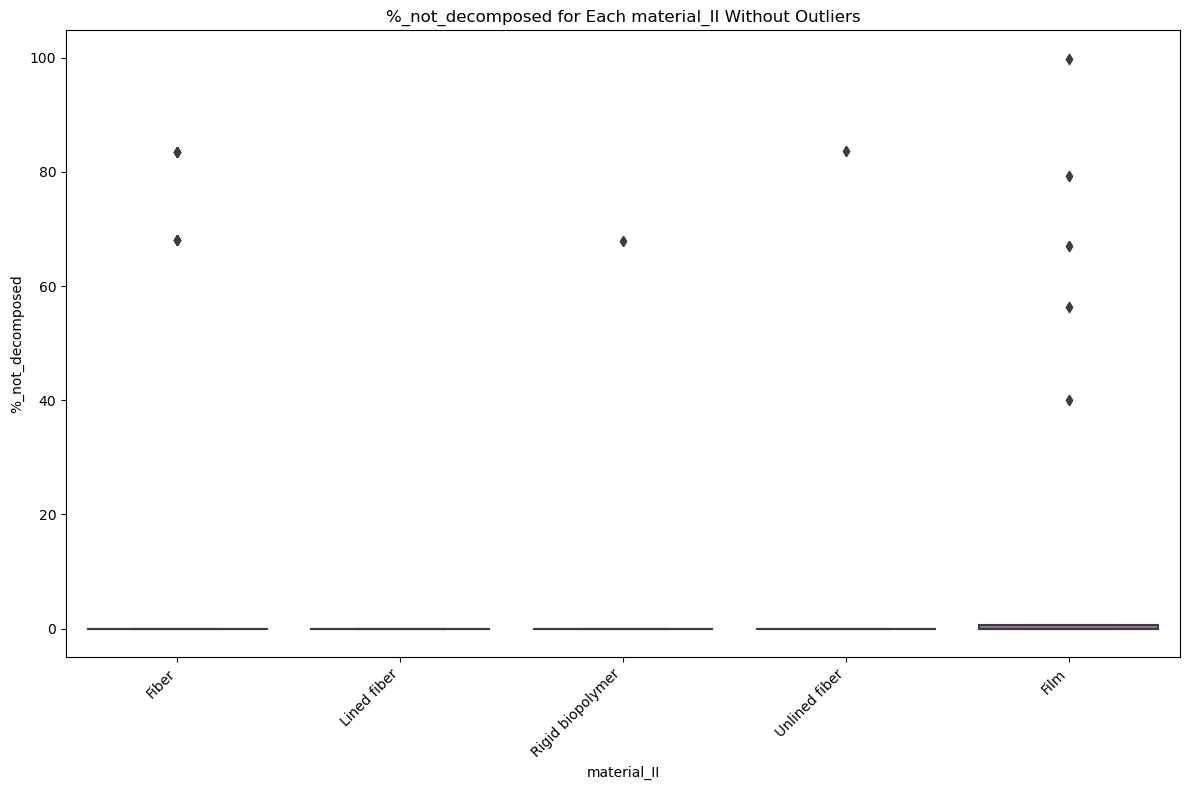

In [292]:
bar_whisker_plot(df_non_outlier, 'material_II', '%_not_decomposed', 'Without Outliers')

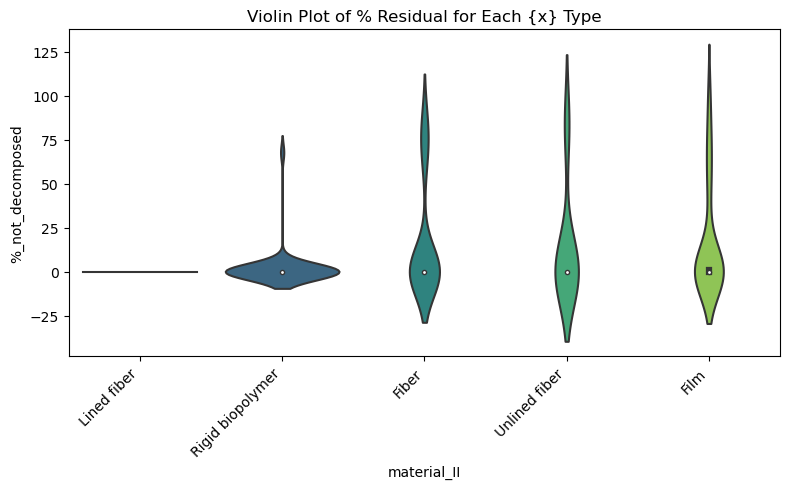

In [293]:
plot_violin(df_non_outlier, 'material_II', '%_not_decomposed')

## % Residual by Material Class III

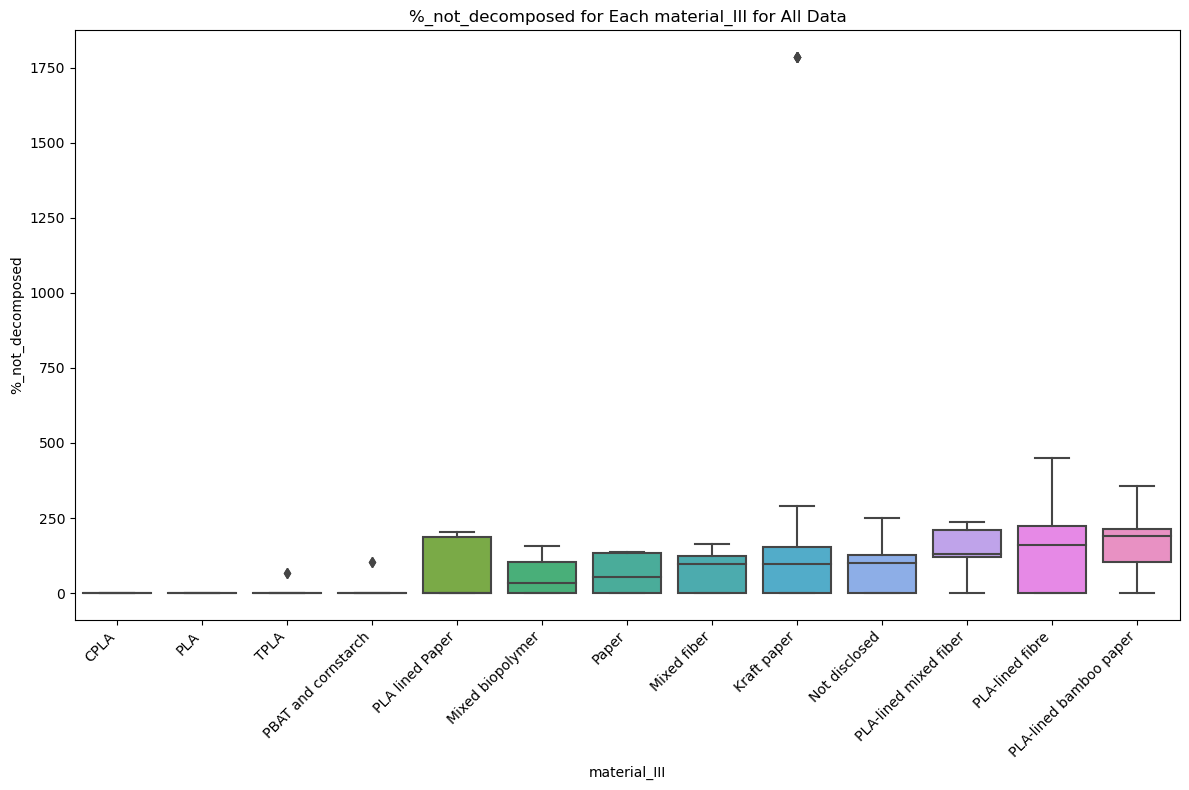

In [294]:
bar_whisker_plot(df_end, 'material_III', '%_not_decomposed', 'for All Data')

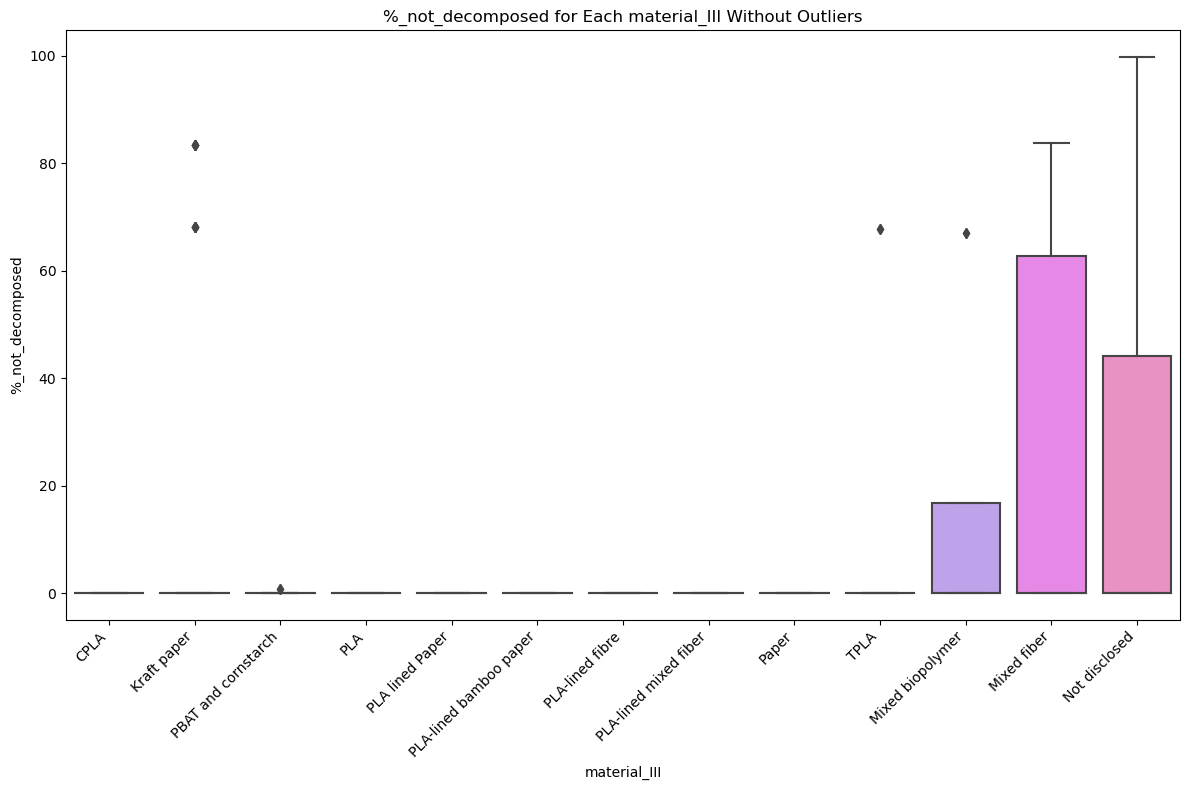

In [295]:
bar_whisker_plot(df_non_outlier, 'material_III', '%_not_decomposed', 'Without Outliers')

## % Residual by Product Brand

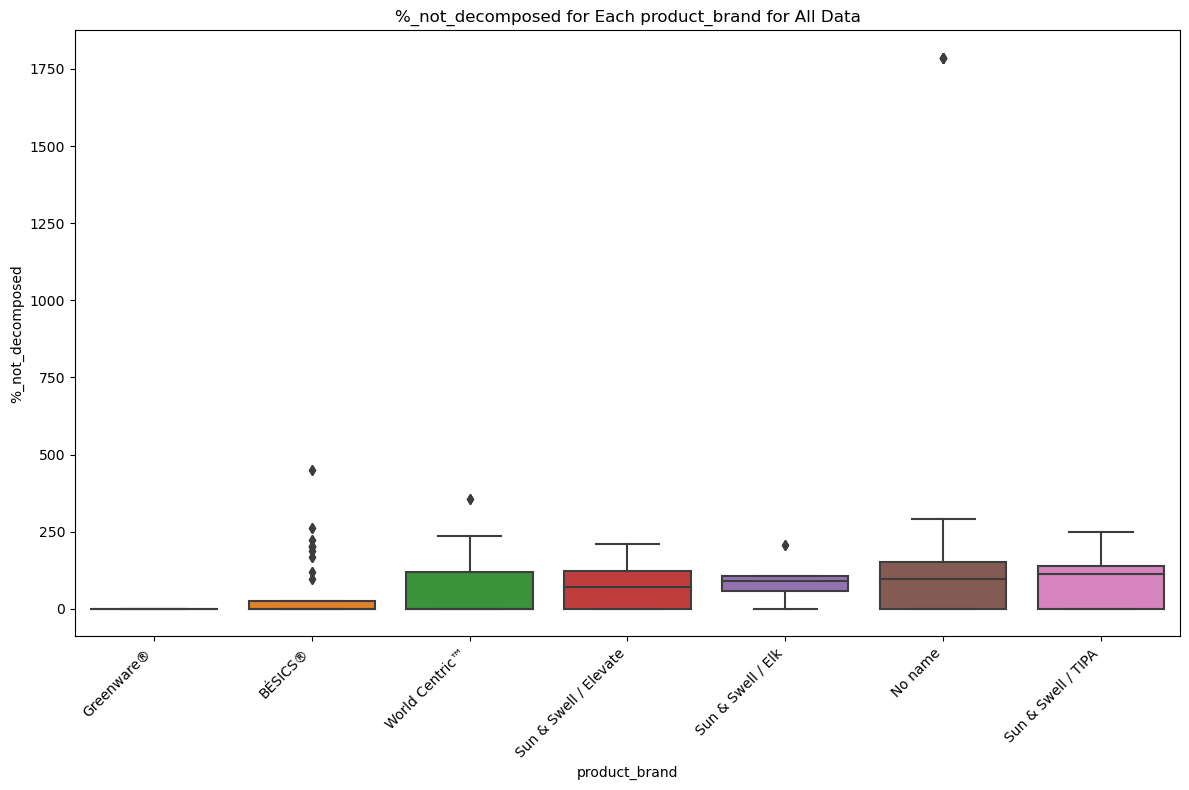

In [296]:
bar_whisker_plot(df_end, 'product_brand', '%_not_decomposed', 'for All Data')

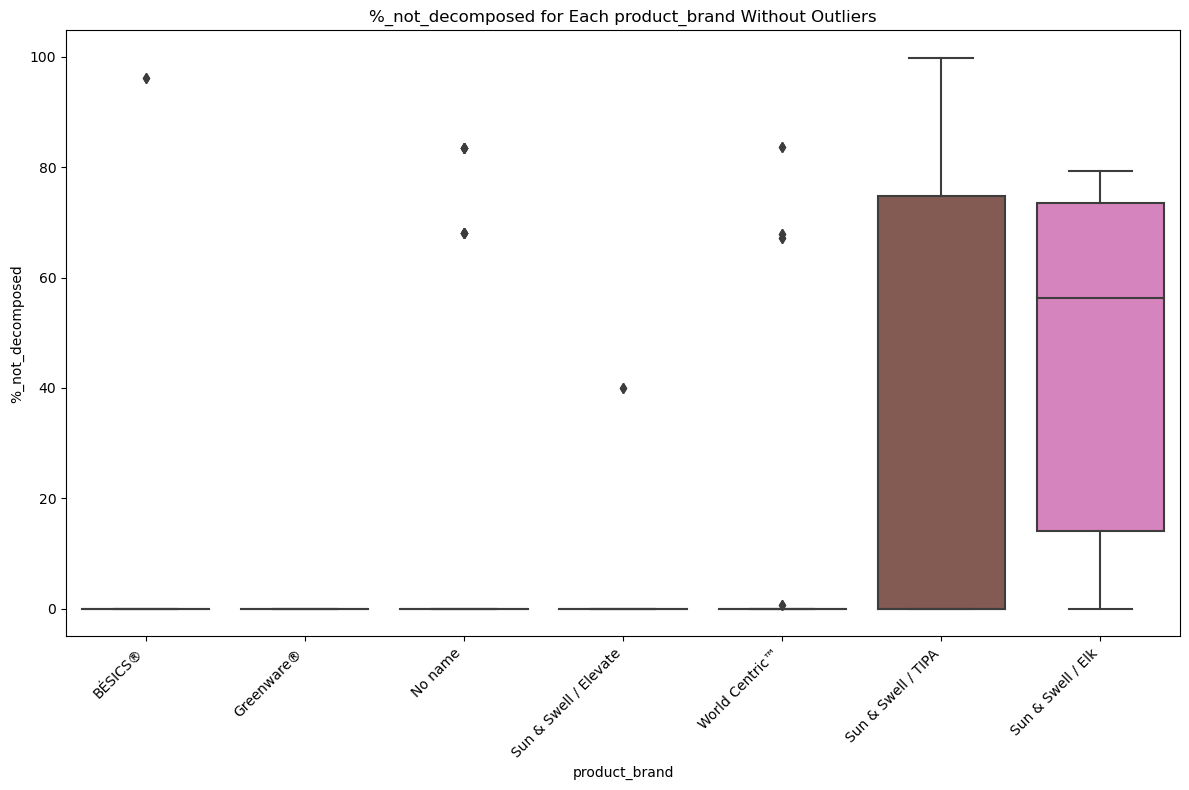

In [297]:
bar_whisker_plot(df_non_outlier, 'product_brand', '%_not_decomposed', 'Without Outliers')

## % Residual by Bag Placement (Top vs. Bottom)

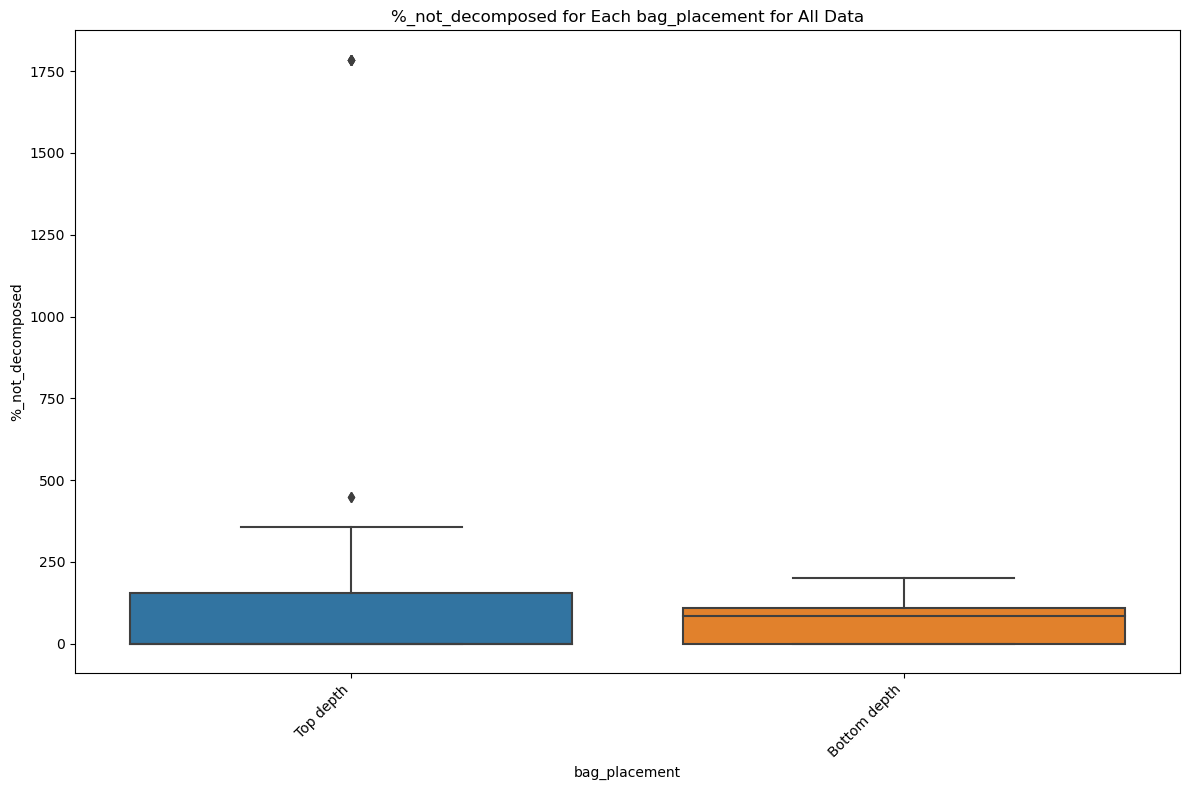

In [298]:
bar_whisker_plot(df_end, 'bag_placement', '%_not_decomposed', 'for All Data')

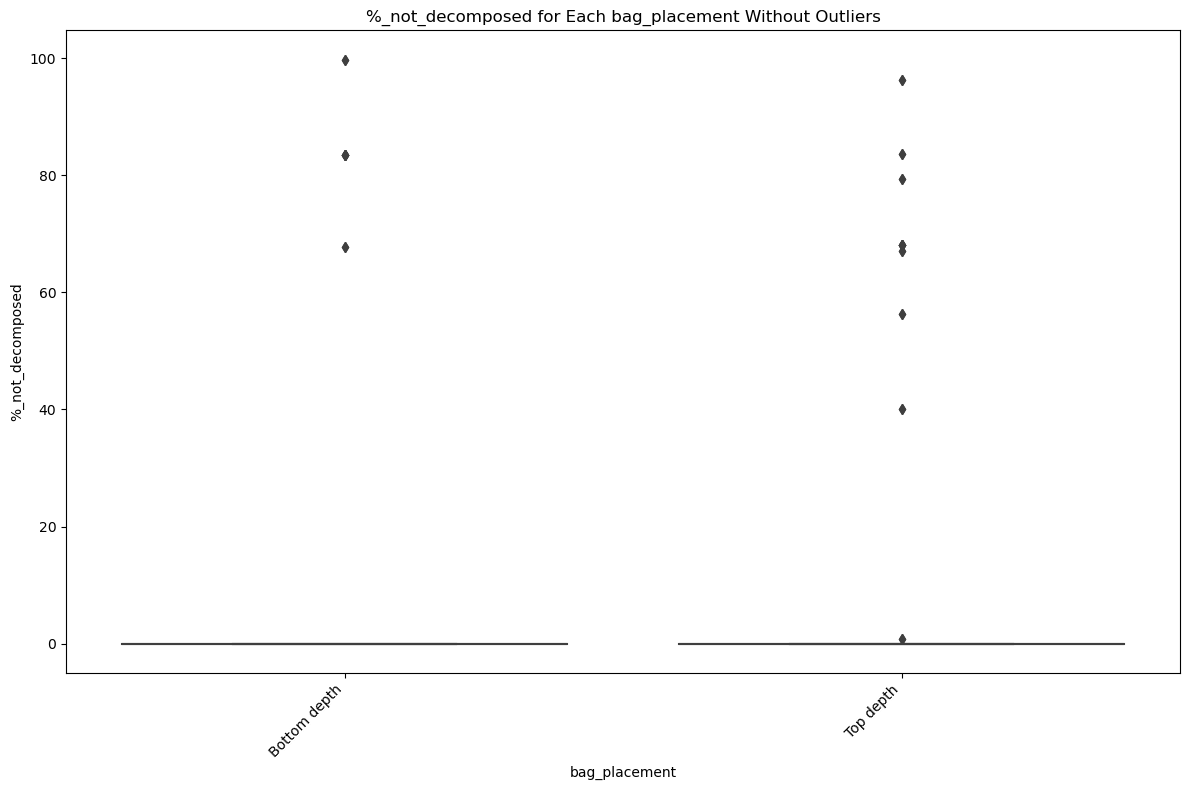

In [299]:
bar_whisker_plot(df_non_outlier, 'bag_placement', '%_not_decomposed', 'Without Outliers')